In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[40,20],
                 [55,30],
                 [70,60],
                 [50,35],
                 [45,40],
                 [62,75],
                 [45,30],
                 [68,80],
                 [80,70],
                 [75,90]])

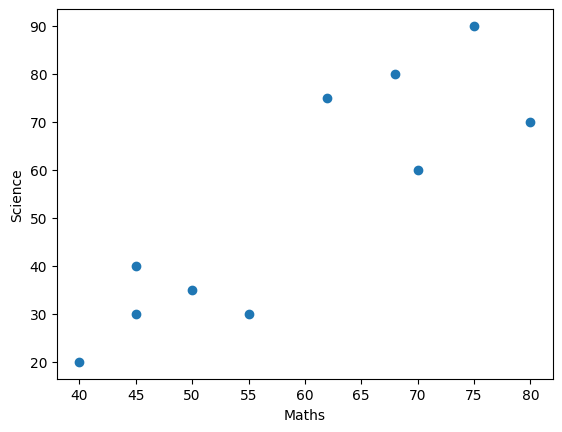

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Maths")
plt.ylabel("Science")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(scaled_data)

PCA(n_components=1)

In [13]:
pca.explained_variance_ratio_

array([0.93500282])

In [14]:
pca_scaled = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(10, 2)

In [16]:
pca_scaled.shape

(10, 1)

In [17]:
pca_scaled = pca.inverse_transform(pca_scaled)

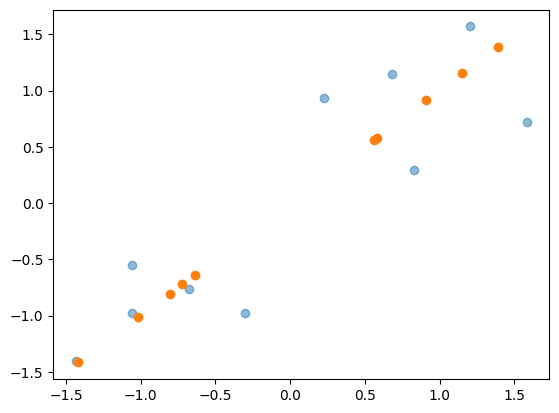

In [18]:
plt.scatter(scaled_data[:,0],scaled_data[:,1],alpha=0.5)
plt.scatter(pca_scaled[:,1],pca_scaled[:,1])

# PCA visualization

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
digits.data.shape

(1797, 64)

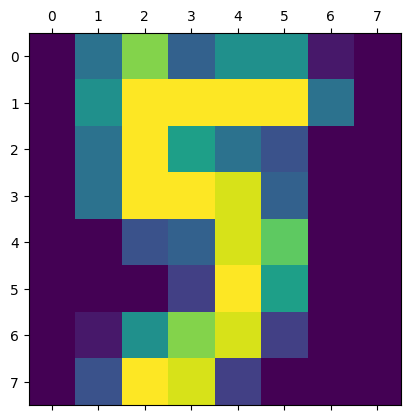

In [31]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[33])
plt.show()

In [32]:
digits.target[33]

5

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)

In [36]:
new_digits.shape

(1797, 2)

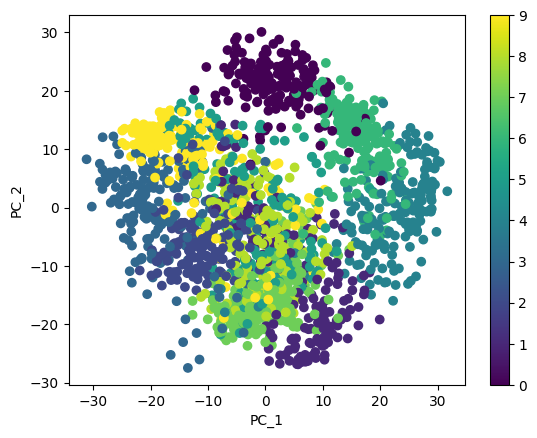

In [39]:
plt.scatter(new_digits[:,0], new_digits[:,1],c=digits.target)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.colorbar()
plt.show()

# PCA for speedup models

In [40]:
digits = load_digits()

In [41]:
digits.data.shape

(1797, 64)

In [50]:
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_data_pca = pca.fit_transform(new_data)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data_pca,digits.target,test_size=0.2,random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=100)

import time
start=time.time()
model.fit(x_train,y_train)
end=time.time()
print((end-start)*1000)

66.36309623718262
